In [2]:
import pandas as pd

# Load the training and test sets
train_df = pd.read_csv("training_cases_75.csv")
test_df = pd.read_csv("test_cases_25.csv")

In [4]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode 'mode' and keep numerical columns
categorical_features = ['mode']
# Use sparse_output=False instead of sparse=False for newer scikit-learn versions
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(train_df[categorical_features])

# Create DataFrame of encoded features
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate encoded mode with numerical features
X_train = pd.concat([train_df.drop(columns=['id', 'mode', 'total_time']), encoded_df], axis=1)
y_train = train_df['total_time']

# Do the same for test set
encoded_test = encoder.transform(test_df[categorical_features])
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))

X_test = pd.concat([test_df.drop(columns=['id', 'mode', 'total_time']), encoded_test_df], axis=1)
y_test = test_df['total_time']

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("R² Score:", r2)


MAE: 1.7468444444444449
R² Score: 0.9204430271353107


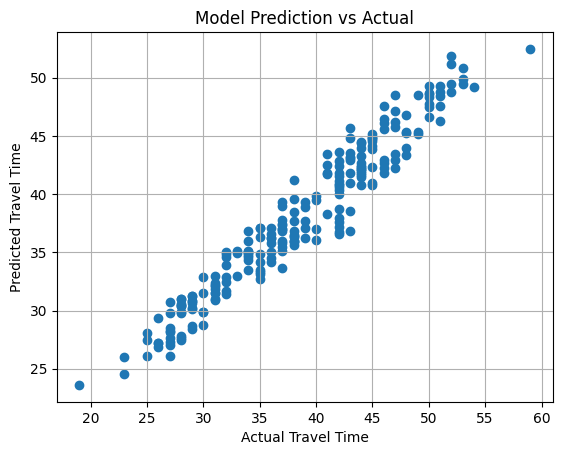

In [6]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Travel Time")
plt.ylabel("Predicted Travel Time")
plt.title("Model Prediction vs Actual")
plt.grid(True)
plt.show()
